In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_excel('Win_Prediction_Data.xlsx')

In [3]:
df.head()

,Client Category,Solution Type,Deal Date,Sector,Location,VP Name,Manager Name,Deal Cost,Deal Status Code
0,Telecom,Solution 7,2012-03-27,Sector 24,L5,Ekta Zutshi,Gopa Trilochana,150000.00,Won
1,Telecom,Solution 7,2012-09-25,Sector 24,L5,Ekta Zutshi,Gopa Trilochana,744705.88,Won
2,Internal,Solution 59,2011-08-01,Sector 20,Others,Ekta Zutshi,Russell Dahlen,60000.00,Lost
3,Internal,Solution 59,2011-04-28,Sector 20,Others,Ekta Zutshi,Russell Dahlen,60000.00,Lost
4,Internal,Solution 32,2011-06-03,Sector 20,Others,Ekta Zutshi,Russell Dahlen,80882.35,Lost


In [4]:
for col in df.columns:
    print(col, ':', len(df[col].unique()), 'labels')

Client Category : 42 labels
Solution Type : 67 labels
Deal Date : 2555 labels
Sector : 25 labels
Location : 13 labels
VP Name : 43 labels
Manager Name : 278 labels
Deal Cost : 1469 labels
Deal Status Code : 2 labels


In [5]:
df.shape

(10061, 9)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10061 entries, 0 to 10060
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Client Category   9982 non-null   object        
 1   Solution Type     10061 non-null  object        
 2   Deal Date         10061 non-null  datetime64[ns]
 3   Sector            10061 non-null  object        
 4   Location          10061 non-null  object        
 5   VP Name           10061 non-null  object        
 6   Manager Name      10061 non-null  object        
 7   Deal Cost         10061 non-null  float64       
 8   Deal Status Code  10061 non-null  object        
dtypes: datetime64[ns](1), float64(1), object(7)
memory usage: 707.5+ KB


In [7]:
df.isnull().sum()

Client Category     79
Solution Type        0
Deal Date            0
Sector               0
Location             0
VP Name              0
Manager Name         0
Deal Cost            0
Deal Status Code     0
dtype: int64

In client Category we have 79 missing values for which we dont know which category these clients belong to.. therefor if We put these clients in any category than this may affect our data, so we will drop these 79 rows to improve our model accuracy

In [8]:
df = df.dropna(axis = 0)

In [9]:
df.isnull().sum()

Client Category     0
Solution Type       0
Deal Date           0
Sector              0
Location            0
VP Name             0
Manager Name        0
Deal Cost           0
Deal Status Code    0
dtype: int64

In [10]:
df.shape

(9982, 9)

In [11]:
#Making Another column in the data as 'Deal Result' Where Deal Won is represented as 1 and Deal Lost is represented as 0

df['Deal result'] = df['Deal Status Code'].map(dict(Won=1, Lost=0))

In [12]:
#checking if the data is balanced or not

df['Deal result'].value_counts(normalize = True).round(2)

0    0.63
1    0.37
Name: Deal result, dtype: float64

Since the data is distributed in 63:37, we can take it as balanced data

In [13]:
#GETTING THE INSIGHTS OF DEAL COST

print('Mean value of deal cost: ', df['Deal Cost'].mean())
print('Median value of deal cost: ', df['Deal Cost'].median())
print('Minimum value of deal cost: ', df['Deal Cost'].min())
print('Maximum value of deal cost: ', df['Deal Cost'].max())

Mean value of deal cost:  768102.378866957
Median value of deal cost:  382352.94
Minimum value of deal cost:  0.0
Maximum value of deal cost:  36764705.88


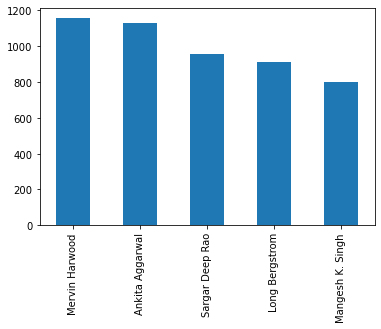

In [14]:
#top 5 VPs who were assigned the most numbers of projects
df['VP Name'].value_counts().head().plot(kind= 'bar')
plt.show()

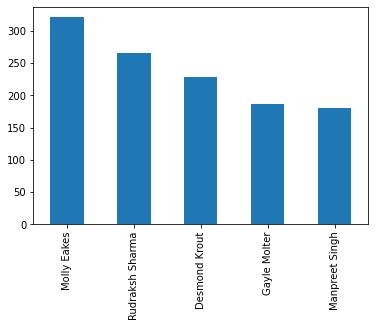

In [15]:
#top 5 managers who were assigned the most numbers of projects
df['Manager Name'].value_counts().head().plot(kind= 'bar')
plt.show()

In [16]:
df.head()

,Client Category,Solution Type,Deal Date,Sector,Location,VP Name,Manager Name,Deal Cost,Deal Status Code,Deal result
0,Telecom,Solution 7,2012-03-27,Sector 24,L5,Ekta Zutshi,Gopa Trilochana,150000.00,Won,1
1,Telecom,Solution 7,2012-09-25,Sector 24,L5,Ekta Zutshi,Gopa Trilochana,744705.88,Won,1
2,Internal,Solution 59,2011-08-01,Sector 20,Others,Ekta Zutshi,Russell Dahlen,60000.00,Lost,0
3,Internal,Solution 59,2011-04-28,Sector 20,Others,Ekta Zutshi,Russell Dahlen,60000.00,Lost,0
4,Internal,Solution 32,2011-06-03,Sector 20,Others,Ekta Zutshi,Russell Dahlen,80882.35,Lost,0


# Visulaising the features

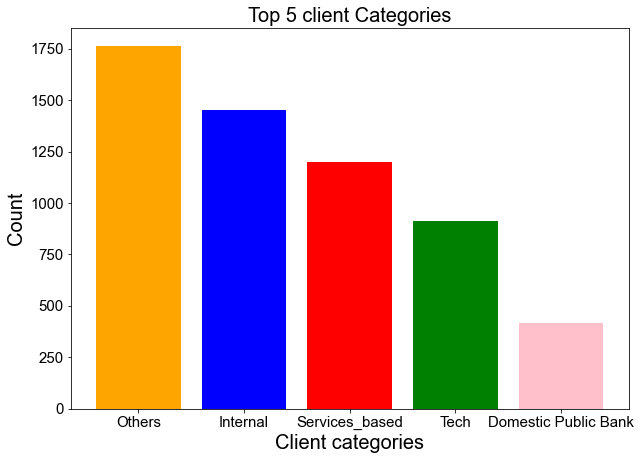

In [17]:
#plot Showing Top 5 client Categories

plt.figure(figsize = (10,7))
plt.bar(df['Client Category'].value_counts().keys()[0:5], df['Client Category'].value_counts()[0:5],
        color = ['orange', 'blue' , 'red', 'green', 'pink'])
plt.yticks(size=15)
plt.xticks(size=15)
plt.title('Top 5 client Categories' , fontsize=20)
plt.ylabel("Count",fontsize=20)
plt.xlabel("Client categories", fontsize=20)
sns.set_style('whitegrid')
plt.show()

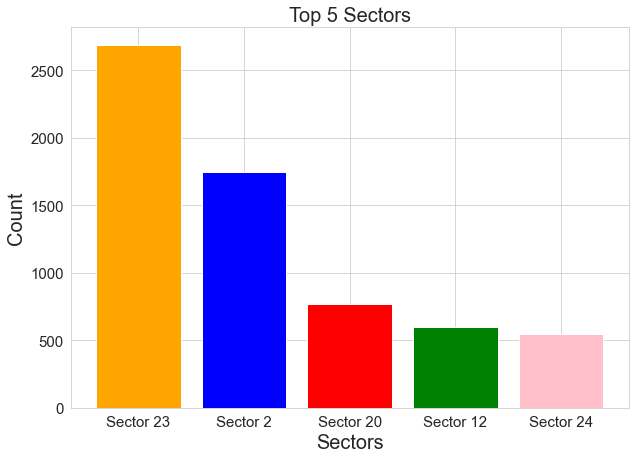

In [18]:
#plot Showing Top 5 Sectors

plt.figure(figsize = (10,7))
plt.bar(df['Sector'].value_counts().keys()[0:5], df['Sector'].value_counts()[0:5],
        color = ['orange', 'blue' , 'red', 'green', 'pink'])
plt.yticks(size=15)
plt.xticks(size=15)
plt.title('Top 5 Sectors' , fontsize=20)
plt.ylabel("Count",fontsize=20)
plt.xlabel("Sectors", fontsize=20)
plt.show()

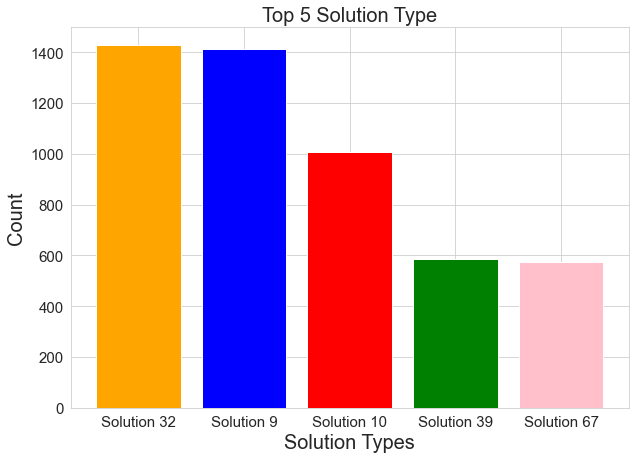

In [19]:
#plot Showing Top 5 Solution Type

plt.figure(figsize = (10,7))
plt.bar(df['Solution Type'].value_counts().keys()[0:5], df['Solution Type'].value_counts()[0:5],
        color = ['orange', 'blue' , 'red', 'green', 'pink'])
plt.yticks(size=15)
plt.xticks(size=15)
plt.title('Top 5 Solution Type' , fontsize=20)
plt.ylabel("Count",fontsize=20)
plt.xlabel("Solution Types", fontsize=20)
plt.show()

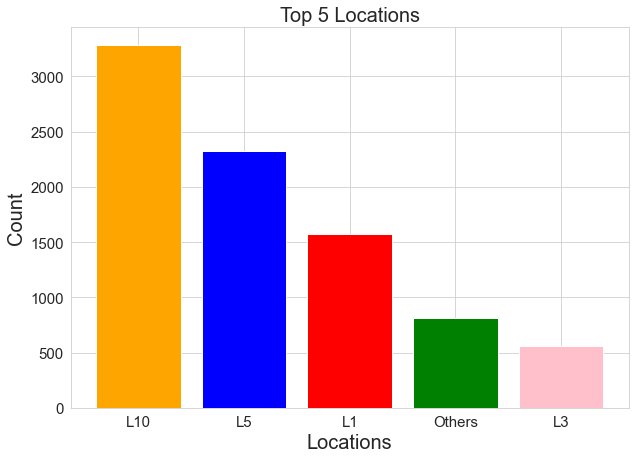

In [20]:
#plot Showing Top 5 Locations

plt.figure(figsize = (10,7))
plt.bar(df['Location'].value_counts().keys()[0:5], df['Location'].value_counts()[0:5],
        color = ['orange', 'blue' , 'red', 'green', 'pink'])
plt.yticks(size=15)
plt.xticks(size=15)
plt.title('Top 5 Locations' , fontsize=20)
plt.ylabel("Count",fontsize=20)
plt.xlabel("Locations", fontsize=20)
plt.show()

In [21]:
df['Month'] = df['Deal Date'].dt.month

In [22]:
df.head()

,Client Category,Solution Type,Deal Date,Sector,Location,VP Name,Manager Name,Deal Cost,Deal Status Code,Deal result,Month
0,Telecom,Solution 7,2012-03-27,Sector 24,L5,Ekta Zutshi,Gopa Trilochana,150000.00,Won,1,3
1,Telecom,Solution 7,2012-09-25,Sector 24,L5,Ekta Zutshi,Gopa Trilochana,744705.88,Won,1,9
2,Internal,Solution 59,2011-08-01,Sector 20,Others,Ekta Zutshi,Russell Dahlen,60000.00,Lost,0,8
3,Internal,Solution 59,2011-04-28,Sector 20,Others,Ekta Zutshi,Russell Dahlen,60000.00,Lost,0,4
4,Internal,Solution 32,2011-06-03,Sector 20,Others,Ekta Zutshi,Russell Dahlen,80882.35,Lost,0,6


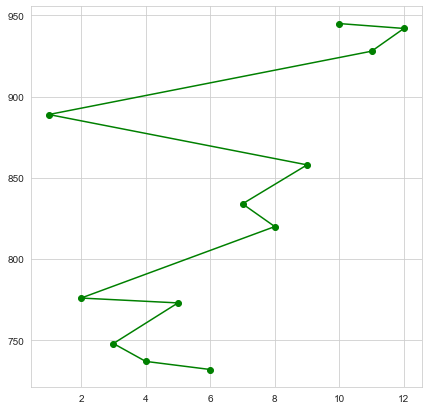

In [23]:
#Checking the number of deals Month wise
plt.figure(figsize = (7,7))
plt.plot(df['Month'].value_counts().keys(), df['Month'].value_counts(), color =  'green', marker = 'o')
plt.show()

From the above observation we can conclude that the deals took place almost every month of the year, therefore it does not make any impact to model hence will not use it in our model building

# Extracting data which only comprises of won deals and storing it in another datframe named won_data

In [24]:
won_data = df[df['Deal result'] ==1]
won_data.head()

,Client Category,Solution Type,Deal Date,Sector,Location,VP Name,Manager Name,Deal Cost,Deal Status Code,Deal result,Month
0,Telecom,Solution 7,2012-03-27,Sector 24,L5,Ekta Zutshi,Gopa Trilochana,150000.00,Won,1,3
1,Telecom,Solution 7,2012-09-25,Sector 24,L5,Ekta Zutshi,Gopa Trilochana,744705.88,Won,1,9
6,Internal,Solution 59,2011-11-03,Sector 2,L10,Mervin Harwood,rahul sharma,526176.47,Won,1,11
8,Consumer Good,Solution 42,2012-04-11,Sector 12,L10,Lilli Storrs,Md. Daud,1032352.94,Won,1,4
10,International Bank,Solution 6,2012-02-11,Sector 2,L10,Long Bergstrom,Luv Malhotra,316176.47,Won,1,2


In [25]:
#Checking the Data

print(won_data.shape)
print(won_data['Deal Status Code'].value_counts())

(3734, 11)
Won    3734
Name: Deal Status Code, dtype: int64


In [26]:
# To get the combinations of Top 5 VPS and Managers we only need these columns in won_data

won_data = won_data[['VP Name', 'Manager Name']]
won_data.head()

,VP Name,Manager Name
0,Ekta Zutshi,Gopa Trilochana
1,Ekta Zutshi,Gopa Trilochana
6,Mervin Harwood,rahul sharma
8,Lilli Storrs,Md. Daud
10,Long Bergstrom,Luv Malhotra


In [27]:
#Calculating Top 5 VPs by ratio of Deals won with Total Projects handelled

top_5_VPs_by_ratios = won_data['VP Name'].value_counts()/df['VP Name'].value_counts()
top_5_Vps = top_5_VPs_by_ratios.sort_values(ascending= False)[0:5]

In [28]:
#Calculating Top 5 Managers by ratio of Deals won with Total Projects handelled

top_5_Managers_by_ratios = won_data['Manager Name'].value_counts()/df['Manager Name'].value_counts()
top_5_Managers = top_5_Managers_by_ratios.sort_values(ascending= False)[0:5]

# Plotting Top 5 VPs who won the deal (by numbers and By ratios)


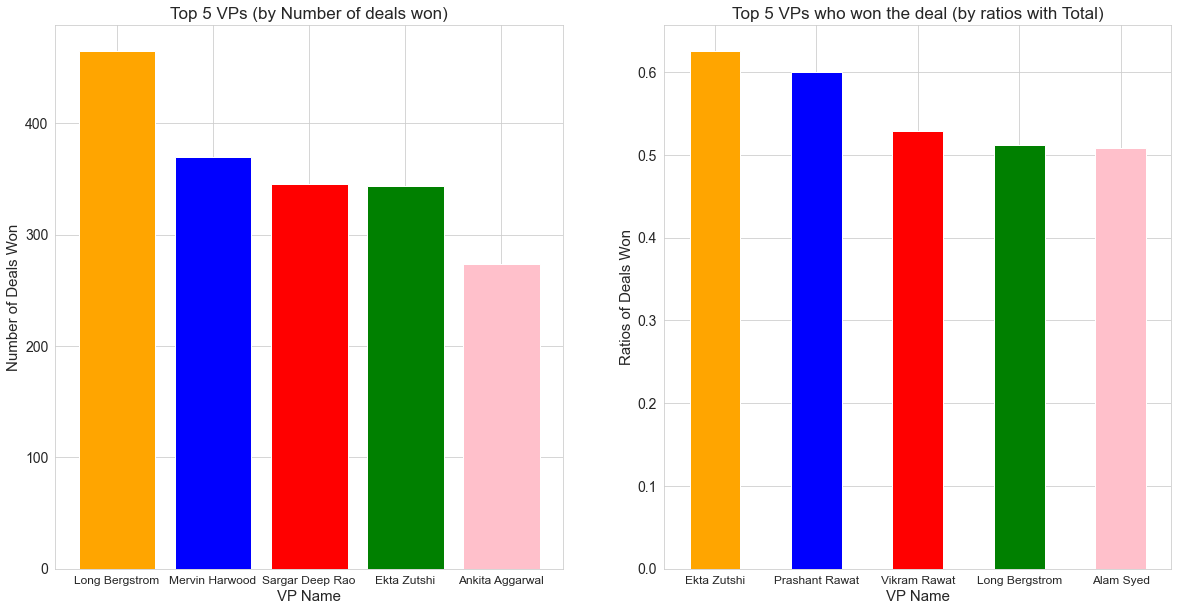

In [29]:
plt.figure(figsize = (20,10))
plt.subplot(1,2,1)
plt.bar(list(won_data['VP Name'].value_counts().keys()[0:5]), list(won_data['VP Name'].value_counts()[0:5]),
       color = ['orange', 'blue' , 'red', 'green', 'pink'])
plt.xlabel('VP Name', size = 15)
plt.ylabel('Number of Deals Won', size = 15)
plt.xticks(size = 12)
plt.yticks(size = 14)
plt.title('Top 5 VPs (by Number of deals won)', size = 17)

plt.subplot(1,2,2)
top_5_Vps.plot.bar(color = ['orange', 'blue' , 'red', 'green', 'pink'])
plt.title('Top 5 VPs who won the deal (by ratios with Total)', size = 17)
plt.xlabel('VP Name',size = 15)
plt.ylabel('Ratios of Deals Won', size = 15)
plt.xticks(size = 12, rotation = 0)
plt.yticks(size = 14)
plt.show()

# Plotting Top 5 Managers who won the deal (by numbers and By ratios)

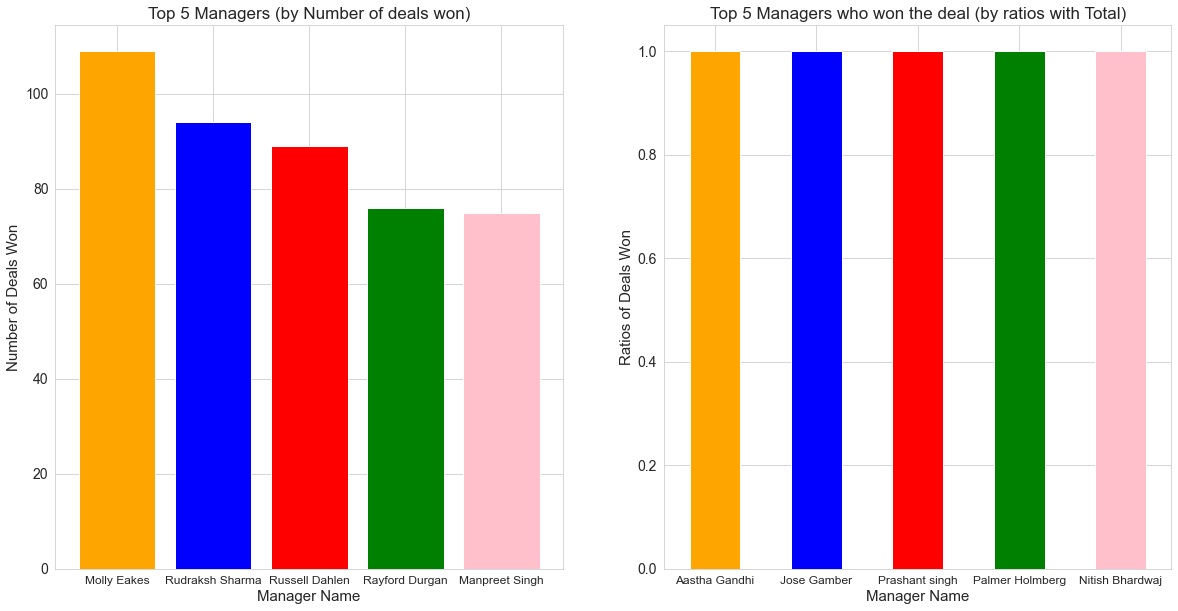

In [30]:
plt.figure(figsize = (20,10))
plt.subplot(1,2,1)
plt.bar(list(won_data['Manager Name'].value_counts().keys()[0:5]), list(won_data['Manager Name'].value_counts()[0:5]),
       color = ['orange', 'blue' , 'red', 'green', 'pink'])
plt.xlabel('Manager Name', size = 15)
plt.ylabel('Number of Deals Won', size = 15)
plt.xticks(size = 12)
plt.yticks(size = 14)
plt.title('Top 5 Managers (by Number of deals won)', size = 17)

plt.subplot(1,2,2)
top_5_Managers.plot.bar(color = ['orange', 'blue' , 'red', 'green', 'pink'])
plt.title('Top 5 Managers who won the deal (by ratios with Total)', size = 17)
plt.xlabel('Manager Name',size = 15)
plt.ylabel('Ratios of Deals Won', size = 15)
plt.xticks(size = 12, rotation = 0)
plt.yticks(size = 14)
plt.show()

# Getting Top 5 Combinations of VPs and Managers who won the deal

In [31]:
combinations = won_data.groupby(['VP Name','Manager Name']).size().reset_index().rename(columns={0:'count'})

In [32]:
top_5_combinations = combinations.sort_values(by = 'count', ascending = False)[0:5]
top_5_combinations

,VP Name,Manager Name,count
265,Long Bergstrom,Russell Dahlen,73
444,Rahul Bajpai,Rudraksh Sharma,72
656,neeraj kumar,Molly Eakes,62
27,Ankita Aggarwal,Desmond Krout,52
664,neeraj kumar,Vinay Kumar,51


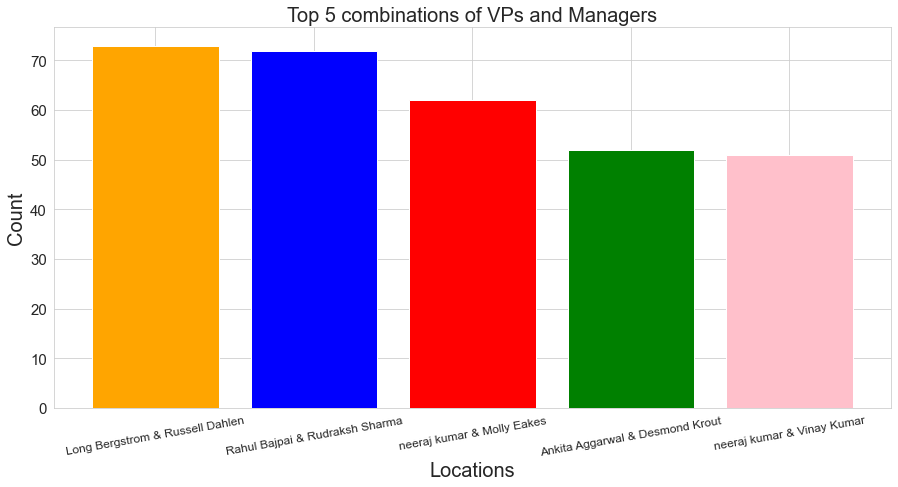

In [33]:
top_5_combinations['Combinations'] = top_5_combinations['VP Name'] + ' & ' + top_5_combinations['Manager Name']

plt.figure(figsize = (15,7))
plt.bar(top_5_combinations['Combinations'], top_5_combinations['count'],
        color = ['orange', 'blue' , 'red', 'green', 'pink'])
plt.yticks(size=15)
plt.xticks(size=12, rotation=10, linespacing=0.4)
plt.title('Top 5 combinations of VPs and Managers' , fontsize=20)
plt.ylabel("Count",fontsize=20)
plt.xlabel("Locations", fontsize=20)
plt.show()

# Making new data set for model building and including only required columns

- Dropping Deal Date and Month because it does not have any effect on Traget class
- Dropping Sector because it is same as location according to Data Dictionary
- Dropping Deal Status code because we have alreaddy created similar column as Deal Result
- Dropping VP name and manager Name because they are identifiers

In [34]:
df.sample()

,Client Category,Solution Type,Deal Date,Sector,Location,VP Name,Manager Name,Deal Cost,Deal Status Code,Deal result,Month
7907,Tech,Solution 9,2014-12-21,Sector 2,L10,Rosanna Maynez,Fredricka Bald,0.0,Lost,0,12


In [35]:
new_df = df[['Client Category', 'Solution Type', 'Location', 'Deal Cost', 'Deal result']]

In [36]:
new_df.sample()

,Client Category,Solution Type,Location,Deal Cost,Deal result
3527,Services_based,Solution 32,L1,147058.82,0


In [37]:
#Encoding the categorical Variables

new_df = pd.get_dummies(new_df, drop_first=True)

In [38]:
new_df.sample()

,Deal Cost,Deal result,Client Category_Automobiles,Client Category_Consulting,Client Category_Consumer Good,Client Category_Domestic Bank,Client Category_Domestic Private Bank,Client Category_Domestic Public Bank,Client Category_Electronics,Client Category_Energy,...,Location_L12,Location_L2,Location_L3,Location_L4,Location_L5,Location_L6,Location_L7,Location_L8,Location_L9,Location_Others
2304,235294.12,1,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [39]:
#from sklearn.preprocessing import MinMaxScaler
#scaler = MinMaxScaler()

In [40]:
#new_df['Deal Cost'] = scaler.fit_transform(new_df[['Deal Cost']])

In [41]:
#new_df.head()

## Model Building

In [42]:
# Splitting the data into X and Y

x = new_df.drop(['Deal result'], axis = 1)
y = new_df['Deal result']

In [43]:
#Adding 1 column is x as Actual (It will be used to calculate Total loss Faced by company for every false prediction)

x['Actual'] = new_df['Deal result']

In [44]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=21)

In [45]:
x_train

,Deal Cost,Client Category_Automobiles,Client Category_Consulting,Client Category_Consumer Good,Client Category_Domestic Bank,Client Category_Domestic Private Bank,Client Category_Domestic Public Bank,Client Category_Electronics,Client Category_Energy,Client Category_Energy,...,Location_L2,Location_L3,Location_L4,Location_L5,Location_L6,Location_L7,Location_L8,Location_L9,Location_Others,Actual
9781,2647058.82,0,0,0,0,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0
1037,165294.12,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1
6670,1764705.88,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
169,294117.65,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8100,441176.47,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9410,455882.35,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
48,188235.29,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
9033,588235.29,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
5988,198529.41,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1


In [46]:
#creating new x_train and x_test dataframe as x_train_1 and x_test_1 and dropping 'Actual'

x_train_1 = x_train.iloc[:,:119]
x_test_1 = x_test.iloc[:,:119]

In [47]:
# distribution in training set
y_train.value_counts(normalize=True)

0    0.627022
1    0.372978
Name: Deal result, dtype: float64

In [48]:
# distribution in test set
y_test.value_counts(normalize=True)

0    0.623372
1    0.376628
Name: Deal result, dtype: float64

In [49]:
#shape of training set
x_train_1.shape, y_train.shape

((6987, 119), (6987,))

In [50]:
#shape of test set
x_test_1.shape, y_test.shape

((2995, 119), (2995,))

In [51]:
x_train_1

,Deal Cost,Client Category_Automobiles,Client Category_Consulting,Client Category_Consumer Good,Client Category_Domestic Bank,Client Category_Domestic Private Bank,Client Category_Domestic Public Bank,Client Category_Electronics,Client Category_Energy,Client Category_Energy,...,Location_L12,Location_L2,Location_L3,Location_L4,Location_L5,Location_L6,Location_L7,Location_L8,Location_L9,Location_Others
9781,2647058.82,0,0,0,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
1037,165294.12,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
6670,1764705.88,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
169,294117.65,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8100,441176.47,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9410,455882.35,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
48,188235.29,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
9033,588235.29,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
5988,198529.41,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


### Attempt #1

**Logistic Regression**

In [52]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [53]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(x_train_1, y_train)

LogisticRegression()

In [54]:
lr.predict(x_train_1)

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [55]:
print(classification_report(y_train, lr.predict(x_train_1)))

              precision    recall  f1-score   support

           0       0.63      1.00      0.77      4381
           1       0.00      0.00      0.00      2606

    accuracy                           0.63      6987
   macro avg       0.31      0.50      0.39      6987
weighted avg       0.39      0.63      0.48      6987



C:\Users\Deepesh Asthana\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Deepesh Asthana\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Deepesh Asthana\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [56]:
lr.predict(x_test_1)

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [57]:
print(classification_report(y_test, lr.predict(x_test_1)))

              precision    recall  f1-score   support

           0       0.62      1.00      0.77      1867
           1       0.00      0.00      0.00      1128

    accuracy                           0.62      2995
   macro avg       0.31      0.50      0.38      2995
weighted avg       0.39      0.62      0.48      2995



C:\Users\Deepesh Asthana\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Deepesh Asthana\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Deepesh Asthana\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


#### Logistic Regression is underfitted model giving good accuracy results. so we will not use it

## Attempt #2

**SGD**

In [58]:
from sklearn.linear_model import SGDClassifier
sgd = SGDClassifier(alpha=0.005)
sgd.fit(x_train_1,y_train)

SGDClassifier(alpha=0.005)

In [59]:
sgd.predict(x_train_1)
print(classification_report(y_train, lr.predict(x_train_1)))

              precision    recall  f1-score   support

           0       0.63      1.00      0.77      4381
           1       0.00      0.00      0.00      2606

    accuracy                           0.63      6987
   macro avg       0.31      0.50      0.39      6987
weighted avg       0.39      0.63      0.48      6987



C:\Users\Deepesh Asthana\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Deepesh Asthana\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Deepesh Asthana\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [60]:
sgd.predict(x_test_1)
print(classification_report(y_test, lr.predict(x_test_1)))

              precision    recall  f1-score   support

           0       0.62      1.00      0.77      1867
           1       0.00      0.00      0.00      1128

    accuracy                           0.62      2995
   macro avg       0.31      0.50      0.38      2995
weighted avg       0.39      0.62      0.48      2995



C:\Users\Deepesh Asthana\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Deepesh Asthana\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Deepesh Asthana\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


#### This model is also underfitted.

## Attempt #3

**Decision Trees**

In [61]:
#importing decision tree classifier 
from sklearn.tree import DecisionTreeClassifier

#creating the decision tree function
dt_model = DecisionTreeClassifier(random_state=10)

In [62]:
#fitting the model
dt_model.fit(x_train_1, y_train)

DecisionTreeClassifier(random_state=10)

In [63]:
#checking the training score
print('Score on Train Data: ',dt_model.score(x_train_1, y_train))

print('Score on Test Data: ', dt_model.score(x_test_1, y_test))

Score on Train Data:  0.9855445827966223
Score on Test Data:  0.7772954924874791


In [64]:
y_pred = dt_model.predict(x_test_1)

In [65]:
y_pred_1 = pd.DataFrame(y_pred)
y_pred_1.value_counts()

0    2118
1     877
dtype: int64

In [66]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[1659  208]
 [ 459  669]]
0.7772954924874791
              precision    recall  f1-score   support

           0       0.78      0.89      0.83      1867
           1       0.76      0.59      0.67      1128

    accuracy                           0.78      2995
   macro avg       0.77      0.74      0.75      2995
weighted avg       0.78      0.78      0.77      2995



**Decision Trees is giving quite good results but we will try Hyperparameter Tuining to improve results**

### Hyperparameter Tuning

##### Randomized Search Cv

In [67]:
from sklearn.model_selection import RandomizedSearchCV

criterian = ['gini', 'entropy']
splitter = ["best", "random"]
max_depth = [int(x) for x in np.linspace(start = 10, stop = 100, num = 10)]
min_samples_split = [2,5,8,10,14]
min_samples_leaf = [1, 2, 4,6,8]
max_features = ["auto", "sqrt", "log2"]

# Create the Decision tree grid
Decision_grid = {'criterion': criterian,
                'splitter': splitter,
                'max_depth': max_depth,
                'min_samples_split': min_samples_split,
                'min_samples_leaf': min_samples_leaf,
                'max_features': max_features}
print(Decision_grid)

{'criterion': ['gini', 'entropy'], 'splitter': ['best', 'random'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100], 'min_samples_split': [2, 5, 8, 10, 14], 'min_samples_leaf': [1, 2, 4, 6, 8], 'max_features': ['auto', 'sqrt', 'log2']}


In [68]:
dt_randomcv = RandomizedSearchCV(estimator= dt_model, param_distributions= Decision_grid,n_iter=100,cv=3,verbose=2,
                               random_state=100,n_jobs=-1)

### fit the randomized model
dt_randomcv.fit(x_train_1, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


RandomizedSearchCV(cv=3, estimator=DecisionTreeClassifier(random_state=10),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [1, 2, 4, 6, 8],
                                        'min_samples_split': [2, 5, 8, 10, 14],
                                        'splitter': ['best', 'random']},
                   random_state=100, verbose=2)

In [69]:
dt_randomcv.best_estimator_

DecisionTreeClassifier(criterion='entropy', max_depth=80, max_features='sqrt',
                       random_state=10)

In [70]:
best_dt_grid = dt_randomcv.best_estimator_

In [71]:
y_pred_dt = best_dt_grid.predict(x_test_1)

In [72]:
print(confusion_matrix(y_test,y_pred_dt))
print("Accuracy Score {}".format(accuracy_score(y_test,y_pred_dt)))
print("Classification report: {}".format(classification_report(y_test,y_pred_dt)))

[[1673  194]
 [ 478  650]]
Accuracy Score 0.7756260434056761
Classification report:               precision    recall  f1-score   support

           0       0.78      0.90      0.83      1867
           1       0.77      0.58      0.66      1128

    accuracy                           0.78      2995
   macro avg       0.77      0.74      0.75      2995
weighted avg       0.77      0.78      0.77      2995



We will try Random Forest Algothrim

## Attempt #4

**Random forest**

In [73]:
from sklearn.ensemble import RandomForestClassifier
rf_classifier=RandomForestClassifier(n_estimators=10).fit(x_train_1,y_train)
prediction=rf_classifier.predict(x_test_1)

In [74]:
#Checking on training dataset
rf_classifier.score(x_train_1, y_train)

0.9630742808072134

The model is performing very good in training dataset. Let's Check on test data

In [75]:
print(confusion_matrix(y_test,prediction))
print(accuracy_score(y_test,prediction))
print(classification_report(y_test,prediction))

[[1653  214]
 [ 535  593]]
0.7499165275459099
              precision    recall  f1-score   support

           0       0.76      0.89      0.82      1867
           1       0.73      0.53      0.61      1128

    accuracy                           0.75      2995
   macro avg       0.75      0.71      0.71      2995
weighted avg       0.75      0.75      0.74      2995



In [76]:
# Manual Hyper parameter tuning

rf_model = RandomForestClassifier(n_estimators = 5, criterion='entropy', max_features= 'sqrt')

In [77]:
rf_model.fit(x_train_1, y_train)

RandomForestClassifier(criterion='entropy', max_features='sqrt', n_estimators=5)

In [78]:
rf_model.score(x_train_1, y_train)

0.9511950765707743

In [79]:
pred = rf_model.predict(x_test_1)

In [80]:
print(confusion_matrix(y_test,pred))
print(accuracy_score(y_test,pred))
print(classification_report(y_test,pred))

[[1592  275]
 [ 503  625]]
0.7402337228714524
              precision    recall  f1-score   support

           0       0.76      0.85      0.80      1867
           1       0.69      0.55      0.62      1128

    accuracy                           0.74      2995
   macro avg       0.73      0.70      0.71      2995
weighted avg       0.74      0.74      0.73      2995



Accuracy decresed after Manual parameter Tuning. We will Try after Hyperparameters Tuning Randomised Search CV

### Randomized Search Cv

In [81]:
from sklearn.model_selection import RandomizedSearchCV
n_estimators = [int(x) for x in np.linspace(start = 10, stop = 200, num = 10)]
max_features = ['auto', 'sqrt','log2']
max_depth = [int(x) for x in np.linspace(10, 100,10)]
min_samples_split = [1,2, 5, 10,14]
min_samples_leaf = [1, 2, 4,6,8]
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
              'criterion':['entropy','gini']}
print(random_grid)

{'n_estimators': [10, 31, 52, 73, 94, 115, 136, 157, 178, 200], 'max_features': ['auto', 'sqrt', 'log2'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100], 'min_samples_split': [1, 2, 5, 10, 14], 'min_samples_leaf': [1, 2, 4, 6, 8], 'criterion': ['entropy', 'gini']}


In [82]:
rf=RandomForestClassifier()
rf_randomcv=RandomizedSearchCV(estimator=rf,param_distributions=random_grid,n_iter=100,cv=3,verbose=2,
                               random_state=100,n_jobs=-1)
### fit the randomized model
rf_randomcv.fit(x_train_1,y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


C:\Users\Deepesh Asthana\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:918: UserWarning: One or more of the test scores are non-finite: [0.68656076 0.69171318 0.6855589  0.65922427 0.69314441 0.67554029
 0.67010162        nan 0.71819093 0.704308   0.69543438 0.6855589
        nan 0.69500501        nan 0.71189352 0.68613139 0.68226707
 0.6955775  0.68384142 0.70030056 0.67868899 0.66652354        nan
 0.66409045 0.73221697 0.68398454 0.69099757 0.71318162        nan
 0.66695291        nan 0.68741949 0.686847          nan 0.6918563
        nan 0.68656076 0.70201803 0.68856448 0.68140833 0.68326893
 0.69457564 0.69085444 0.66738228        nan 0.69772435 0.73007013
        nan        nan        nan        nan 0.6849864  0.68512953
 0.72405897 0.68241019        nan        nan 0.69357378 0.70359239
        nan 0.68713325 0.68956634 0.66366108 0.70845857 0.68956634
        nan 0.67396594 0.68040647 0.66666667 0.70573923 0.70573923
 0.71604408 0.68913697 0.68384142 0.69457564 

RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'criterion': ['entropy', 'gini'],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [1, 2, 4, 6, 8],
                                        'min_samples_split': [1, 2, 5, 10, 14],
                                        'n_estimators': [10, 31, 52, 73, 94,
                                                         115, 136, 157, 178,
                                                         200]},
                   random_state=100, verbose=2)

In [83]:
rf_randomcv.best_params_

{'n_estimators': 200,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'log2',
 'max_depth': 80,
 'criterion': 'entropy'}

In [84]:
best_random_grid=rf_randomcv.best_estimator_

In [85]:
pred_rf = best_random_grid.predict(x_test_1)
print(confusion_matrix(y_test,pred_rf))
print(accuracy_score(y_test,pred_rf))
print(classification_report(y_test,pred_rf))

[[1677  190]
 [ 488  640]]
0.7736227045075125
              precision    recall  f1-score   support

           0       0.77      0.90      0.83      1867
           1       0.77      0.57      0.65      1128

    accuracy                           0.77      2995
   macro avg       0.77      0.73      0.74      2995
weighted avg       0.77      0.77      0.76      2995



Accuracy increased a little bit. We will try Grid Search CV

### GridSearch CV

In [86]:
rf_randomcv.best_params_

{'n_estimators': 200,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'log2',
 'max_depth': 80,
 'criterion': 'entropy'}

In [87]:
from sklearn.model_selection import GridSearchCV

rf_param_grid = {
    'criterion': [rf_randomcv.best_params_['criterion']],
    'max_depth': [rf_randomcv.best_params_['max_depth']],
    'max_features': [rf_randomcv.best_params_['max_features']],
    'min_samples_leaf': [rf_randomcv.best_params_['min_samples_leaf'], 
                         rf_randomcv.best_params_['min_samples_leaf']+2, 
                         rf_randomcv.best_params_['min_samples_leaf'] + 4],
    'min_samples_split': [rf_randomcv.best_params_['min_samples_split'] + 1,
                          rf_randomcv.best_params_['min_samples_split'] + 2,
                          rf_randomcv.best_params_['min_samples_split'] + 3, 
                          rf_randomcv.best_params_['min_samples_split'] + 4,
                          rf_randomcv.best_params_['min_samples_split'] + 5],
    'n_estimators': [rf_randomcv.best_params_['n_estimators'] - 100, rf_randomcv.best_params_['n_estimators'] - 57, 
                     rf_randomcv.best_params_['n_estimators'], 
                     rf_randomcv.best_params_['n_estimators'] + 57, rf_randomcv.best_params_['n_estimators'] + 100]
}

print(rf_param_grid)

{'criterion': ['entropy'], 'max_depth': [80], 'max_features': ['log2'], 'min_samples_leaf': [1, 3, 5], 'min_samples_split': [3, 4, 5, 6, 7], 'n_estimators': [100, 143, 200, 257, 300]}


In [88]:
# Fit the grid_search to the data

rf=RandomForestClassifier()
grid_search=GridSearchCV(estimator=rf,param_grid=rf_param_grid,cv=10,n_jobs=-1,verbose=2)
grid_search.fit(x_train_1,y_train)

Fitting 10 folds for each of 75 candidates, totalling 750 fits


GridSearchCV(cv=10, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'criterion': ['entropy'], 'max_depth': [80],
                         'max_features': ['log2'],
                         'min_samples_leaf': [1, 3, 5],
                         'min_samples_split': [3, 4, 5, 6, 7],
                         'n_estimators': [100, 143, 200, 257, 300]},
             verbose=2)

In [89]:
grid_search.best_estimator_

RandomForestClassifier(criterion='entropy', max_depth=80, max_features='log2',
                       min_samples_split=3, n_estimators=300)

In [90]:
rf_best_grid=grid_search.best_estimator_

In [91]:
y_pred_grid=rf_best_grid.predict(x_test_1)
print(confusion_matrix(y_test,y_pred_grid))
print("Accuracy Score {}".format(accuracy_score(y_test,y_pred_grid)))
print("Classification report: {}".format(classification_report(y_test,y_pred_grid)))

[[1658  209]
 [ 497  631]]
Accuracy Score 0.7642737896494157
Classification report:               precision    recall  f1-score   support

           0       0.77      0.89      0.82      1867
           1       0.75      0.56      0.64      1128

    accuracy                           0.76      2995
   macro avg       0.76      0.72      0.73      2995
weighted avg       0.76      0.76      0.76      2995



### Attempt 5

**KNN**

In [92]:
# Create-KNN-model by checking upto 10 neighbours

from sklearn.neighbors import KNeighborsClassifier
KNN = KNeighborsClassifier()

for K in range(10):
    K_value = K+1
    neigh = KNeighborsClassifier(n_neighbors = K_value, weights='uniform', algorithm='auto')
    neigh.fit(x_train_1, y_train) 
    y_pred_k = neigh.predict(x_test_1)
    print ("Accuracy is ", accuracy_score(y_test,y_pred_k)*100,"% for K-Value:",K_value)
    print(confusion_matrix(y_test, y_pred_k))

Accuracy is  75.6594323873122 % for K-Value: 1
[[1633  234]
 [ 495  633]]
Accuracy is  71.21869782971619 % for K-Value: 2
[[1760  107]
 [ 755  373]]
Accuracy is  66.4440734557596 % for K-Value: 3
[[1486  381]
 [ 624  504]]
Accuracy is  65.9432387312187 % for K-Value: 4
[[1622  245]
 [ 775  353]]
Accuracy is  66.6110183639399 % for K-Value: 5
[[1478  389]
 [ 611  517]]
Accuracy is  64.90818030050085 % for K-Value: 6
[[1590  277]
 [ 774  354]]
Accuracy is  64.34056761268782 % for K-Value: 7
[[1468  399]
 [ 669  459]]
Accuracy is  64.00667779632721 % for K-Value: 8
[[1577  290]
 [ 788  340]]
Accuracy is  64.30717863105176 % for K-Value: 9
[[1493  374]
 [ 695  433]]
Accuracy is  64.57429048414023 % for K-Value: 10
[[1582  285]
 [ 776  352]]


**After KNN we have tried SVC, but that was giving same results, hence dropped from the final output. Here, We have implemented in total 6 ML models and calculated their accuracy. We have also implemented Hyperparametric Tuning out of which we have concluded that Decision Trees classifiier has shown the best accuracy result (77.4%). We will use Decision Trees Classifier after Randomized Search Cv as our final model.**

## Calculating loss comapany will face for false predictions

In [93]:
x_test

,Deal Cost,Client Category_Automobiles,Client Category_Consulting,Client Category_Consumer Good,Client Category_Domestic Bank,Client Category_Domestic Private Bank,Client Category_Domestic Public Bank,Client Category_Electronics,Client Category_Energy,Client Category_Energy,...,Location_L2,Location_L3,Location_L4,Location_L5,Location_L6,Location_L7,Location_L8,Location_L9,Location_Others,Actual
5351,441176.47,0,1,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2389,47058.82,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3876,176470.59,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
523,470588.24,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1
5688,1470.59,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5200,1235294.12,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
574,1823529.41,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
8444,235294.12,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9747,1014705.88,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [110]:
#Creating one column as predictions where we will put the predictions on training data
x_test['Predictions'] = y_pred_dt
x_test

<ipython-input-110-c8cbab6a813e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_test['Predictions'] = y_pred_dt


,Deal Cost,Client Category_Automobiles,Client Category_Consulting,Client Category_Consumer Good,Client Category_Domestic Bank,Client Category_Domestic Private Bank,Client Category_Domestic Public Bank,Client Category_Electronics,Client Category_Energy,Client Category_Energy,...,Location_L3,Location_L4,Location_L5,Location_L6,Location_L7,Location_L8,Location_L9,Location_Others,Actual,Predictions
5351,441176.47,0,1,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
2389,47058.82,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1
3876,176470.59,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
523,470588.24,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,1
5688,1470.59,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5200,1235294.12,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
574,1823529.41,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
8444,235294.12,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9747,1014705.88,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [111]:
False_prediction = x_test.loc[(x_test['Actual']==0) & (x_test['Predictions']==1)]
False_prediction.shape

(194, 121)

In [112]:
False_prediction['Deal Cost'].sum().round(2)

106898823.62

Above we can see that on making predictions on the Test data, we can see that the Total Loss Company will face on false predictions is around **106 Million**